# Exploring pangolin's mutation annotated tree

In [30]:
import os
from collections import defaultdict
from matplotlib import pyplot as plt
from Bio.Phylo.NewickIO import Parser
from pyrocov.fasta import PANGOLEARN_DATA
from pyrocov.external.usher import parsimony_pb2
from pyrocov.usher import Mutation, NUCLEOTIDE, refine_mutation_tree

In [25]:
with open(os.path.join(PANGOLEARN_DATA, "lineageTree.pb"), "rb") as f:
    proto = parsimony_pb2.data.FromString(f.read())

In [26]:
tree = next(Parser.from_string(proto.newick).parse())
clades = list(tree.find_clades())
assert len(proto.metadata) == len(clades)
assert len(proto.node_mutations) == len(clades)

In [27]:
clade_to_muts = defaultdict(dict)
for clade, muts in zip(clades, proto.node_mutations):
    for mut in muts.mutation:
        clade_to_muts[clade][mut.position] = Mutation(
            mut.position,
            NUCLEOTIDE[mut.ref_nuc],
            "".join(NUCLEOTIDE[n] for n in mut.mut_nuc),
        )
    for c in clade.clades:
        clade_to_muts[c].update(clade_to_muts[clade])

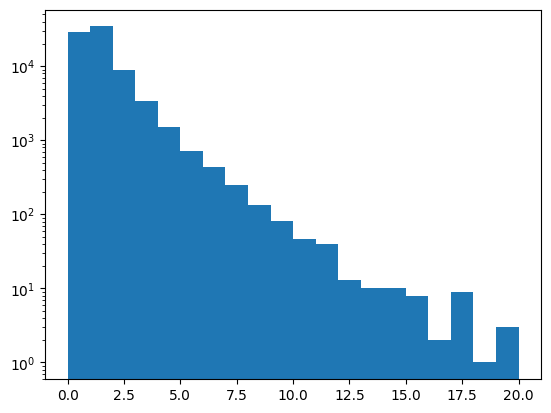

In [28]:
plt.hist([len(m.mutation) for m in proto.node_mutations], bins=range(21))
plt.yscale("log")

In [32]:
from pyrocov.usher import refine_mutation_tree
refine_mutation_tree(
    os.path.join(PANGOLEARN_DATA, "lineageTree.pb"),
    "results/fine.lineageTree.pb",
)

In [ ]:
!python preprocess_pangolin.py \
  --tree-file-in results/fine.lineageTree.pb \
  --features-file-out results/fine.features.pt